In [134]:
import pandas as pd
import seaborn as sns
import numpy as np

In [75]:
df = pd.read_csv('asthma-deaths-by-county-2014_2019.csv',encoding='latin-1')

In [76]:
df.head()

,COUNTY,YEARS,STRATA,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,COMMENT
0,California,20142016,Total population,All ages,"1,181",9.6,NaN
1,Alameda,20142016,Total population,All ages,58,11.2,NaN
2,Alpine,20142016,Total population,All ages,0,0.0,NaN
3,Amador,20142016,Total population,All ages,0,0.0,NaN
4,Butte,20142016,Total population,All ages,7,NaN,Rate not available due to statistical instability


In [77]:
df.isnull()

,COUNTY,YEARS,STRATA,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,COMMENT
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
349,False,False,False,False,False,False,True
350,False,False,False,False,True,True,False
351,False,False,False,False,False,False,True
352,False,False,False,False,True,True,False


In [78]:
df.isnull().sum()

COUNTY                           0
YEARS                            0
STRATA                           0
AGE GROUP                        0
NUMBER OF DEATHS               116
AGE-ADJUSTED MORTALITY RATE    150
COMMENT                        204
dtype: int64

In [79]:
newdf = df.copy()

In [80]:
newdf.drop('COMMENT', axis=1, inplace=True)

In [81]:
df

,COUNTY,YEARS,STRATA,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,COMMENT
0,California,20142016,Total population,All ages,"1,181",9.6,NaN
1,Alameda,20142016,Total population,All ages,58,11.2,NaN
2,Alpine,20142016,Total population,All ages,0,0.0,NaN
3,Amador,20142016,Total population,All ages,0,0.0,NaN
4,Butte,20142016,Total population,All ages,7,NaN,Rate not available due to statistical instability
...,...,...,...,...,...,...,...
349,Tulare,20172019,Child vs. adult,18+ years,16,15.5,NaN
350,Tuolumne,20172019,Child vs. adult,18+ years,NaN,NaN,Count and rate suppressed in accordance with d...
351,Ventura,20172019,Child vs. adult,18+ years,17,7.7,NaN
352,Yolo,20172019,Child vs. adult,18+ years,NaN,NaN,Count and rate suppressed in accordance with d...


In [82]:
newdf

,COUNTY,YEARS,STRATA,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE
0,California,20142016,Total population,All ages,"1,181",9.6
1,Alameda,20142016,Total population,All ages,58,11.2
2,Alpine,20142016,Total population,All ages,0,0.0
3,Amador,20142016,Total population,All ages,0,0.0
4,Butte,20142016,Total population,All ages,7,NaN
...,...,...,...,...,...,...
349,Tulare,20172019,Child vs. adult,18+ years,16,15.5
350,Tuolumne,20172019,Child vs. adult,18+ years,NaN,NaN
351,Ventura,20172019,Child vs. adult,18+ years,17,7.7
352,Yolo,20172019,Child vs. adult,18+ years,NaN,NaN


In [85]:
newdf = newdf.dropna()

In [86]:
newdf['YEARS'].replace(' ', '-')

0      20142016
1      20142016
2      20142016
3      20142016
7      20142016
         ...    
343    20172019
344    20172019
345    20172019
349    20172019
351    20172019
Name: YEARS, Length: 204, dtype: object

In [87]:
#newdf = newdf.replace(' ','-', regex=True)

In [88]:
newdf

,COUNTY,YEARS,STRATA,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE
0,California,20142016,Total population,All ages,"1,181",9.6
1,Alameda,20142016,Total population,All ages,58,11.2
2,Alpine,20142016,Total population,All ages,0,0.0
3,Amador,20142016,Total population,All ages,0,0.0
7,Contra Costa,20142016,Total population,All ages,40,10.6
...,...,...,...,...,...,...
343,Solano,20172019,Child vs. adult,18+ years,20,20.5
344,Sonoma,20172019,Child vs. adult,18+ years,24,15.2
345,Stanislaus,20172019,Child vs. adult,18+ years,25,19.1
349,Tulare,20172019,Child vs. adult,18+ years,16,15.5


In [89]:
newdf['syear'] = newdf['YEARS'].str[:4]

/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
newdf['eyear'] = newdf['YEARS'].str[5:]

/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
newdf

,COUNTY,YEARS,STRATA,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,syear,eyear
0,California,20142016,Total population,All ages,"1,181",9.6,2014,2016
1,Alameda,20142016,Total population,All ages,58,11.2,2014,2016
2,Alpine,20142016,Total population,All ages,0,0.0,2014,2016
3,Amador,20142016,Total population,All ages,0,0.0,2014,2016
7,Contra Costa,20142016,Total population,All ages,40,10.6,2014,2016
...,...,...,...,...,...,...,...,...
343,Solano,20172019,Child vs. adult,18+ years,20,20.5,2017,2019
344,Sonoma,20172019,Child vs. adult,18+ years,24,15.2,2017,2019
345,Stanislaus,20172019,Child vs. adult,18+ years,25,19.1,2017,2019
349,Tulare,20172019,Child vs. adult,18+ years,16,15.5,2017,2019


In [92]:
newdf['years'] = newdf['syear']+ "-"+newdf['eyear']

/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
newdf

,COUNTY,YEARS,STRATA,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,syear,eyear,years
0,California,20142016,Total population,All ages,"1,181",9.6,2014,2016,2014-2016
1,Alameda,20142016,Total population,All ages,58,11.2,2014,2016,2014-2016
2,Alpine,20142016,Total population,All ages,0,0.0,2014,2016,2014-2016
3,Amador,20142016,Total population,All ages,0,0.0,2014,2016,2014-2016
7,Contra Costa,20142016,Total population,All ages,40,10.6,2014,2016,2014-2016
...,...,...,...,...,...,...,...,...,...
343,Solano,20172019,Child vs. adult,18+ years,20,20.5,2017,2019,2017-2019
344,Sonoma,20172019,Child vs. adult,18+ years,24,15.2,2017,2019,2017-2019
345,Stanislaus,20172019,Child vs. adult,18+ years,25,19.1,2017,2019,2017-2019
349,Tulare,20172019,Child vs. adult,18+ years,16,15.5,2017,2019,2017-2019


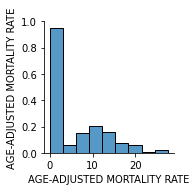

In [94]:
sns.pairplot(newdf)

In [95]:
newdf.describe()

,AGE-ADJUSTED MORTALITY RATE
count,204.000000
mean,5.420098
std,6.952955
min,0.000000
25%,0.000000
50%,0.000000
75%,11.025000
max,27.600000


In [96]:
newdf.dtypes

COUNTY                          object
YEARS                           object
STRATA                          object
AGE GROUP                       object
NUMBER OF DEATHS                object
AGE-ADJUSTED MORTALITY RATE    float64
syear                           object
eyear                           object
years                           object
dtype: object

In [112]:
newdf['NUMBER OF DEATHS'] = newdf['NUMBER OF DEATHS'].replace(['1,181'], '1181')
newdf['NUMBER OF DEATHS'] = newdf['NUMBER OF DEATHS'].replace(['1,126'], '1126')

/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## remove all commas from the column

In [114]:
newdf = newdf.replace(',','', regex=True)

In [115]:
newdf['NUMBER OF DEATHS'] = newdf['NUMBER OF DEATHS'].astype(int)

In [116]:
newdf

,COUNTY,YEARS,STRATA,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,syear,eyear,years
0,California,20142016,Total population,All ages,1181,9.6,2014,2016,2014-2016
1,Alameda,20142016,Total population,All ages,58,11.2,2014,2016,2014-2016
2,Alpine,20142016,Total population,All ages,0,0.0,2014,2016,2014-2016
3,Amador,20142016,Total population,All ages,0,0.0,2014,2016,2014-2016
7,Contra Costa,20142016,Total population,All ages,40,10.6,2014,2016,2014-2016
...,...,...,...,...,...,...,...,...,...
343,Solano,20172019,Child vs. adult,18+ years,20,20.5,2017,2019,2017-2019
344,Sonoma,20172019,Child vs. adult,18+ years,24,15.2,2017,2019,2017-2019
345,Stanislaus,20172019,Child vs. adult,18+ years,25,19.1,2017,2019,2017-2019
349,Tulare,20172019,Child vs. adult,18+ years,16,15.5,2017,2019,2017-2019


In [117]:
newdf.describe()

,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE
count,204.000000,204.000000
mean,43.480392,5.420098
std,163.225869,6.952955
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,25.000000,11.025000
max,1181.000000,27.600000


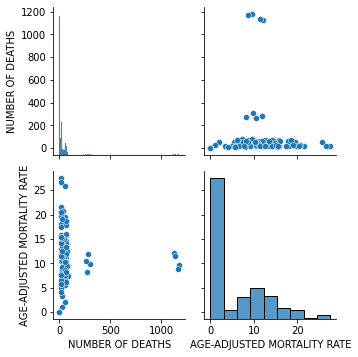

In [118]:
sns.pairplot(newdf)

In [120]:
newdf.corr()

,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE
NUMBER OF DEATHS,1.00000,0.21464
AGE-ADJUSTED MORTALITY RATE,0.21464,1.00000


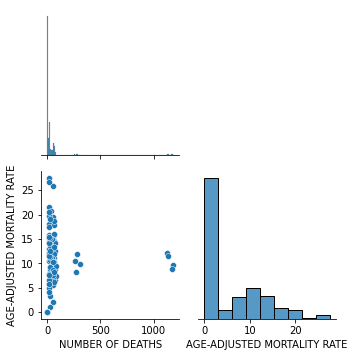

In [121]:
g = sns.pairplot(newdf,corner=True)

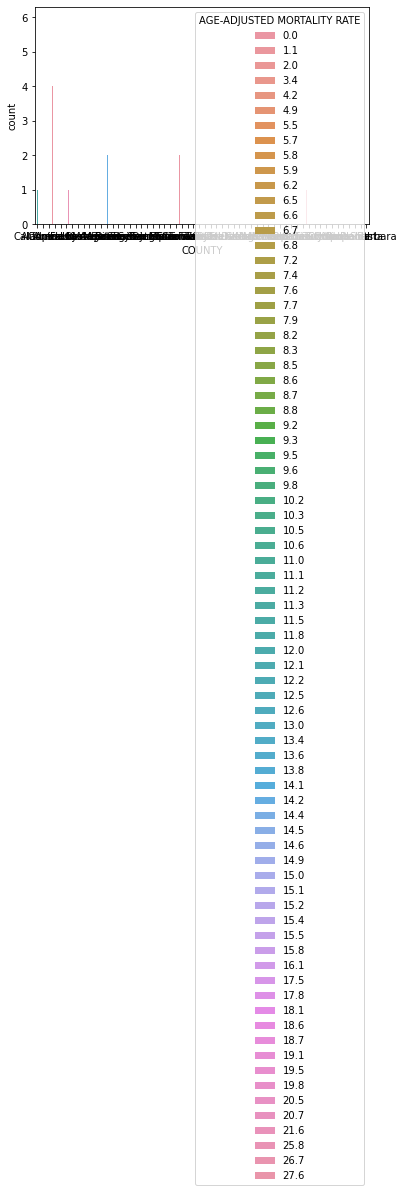

/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


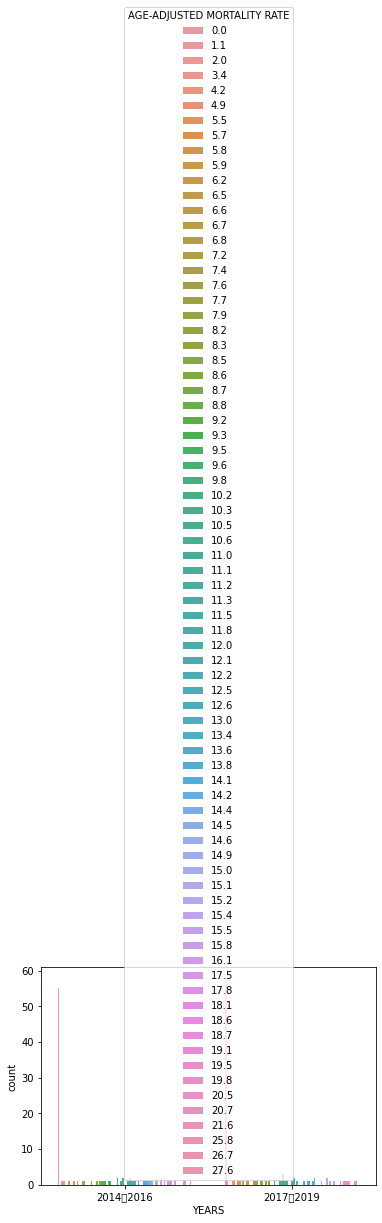

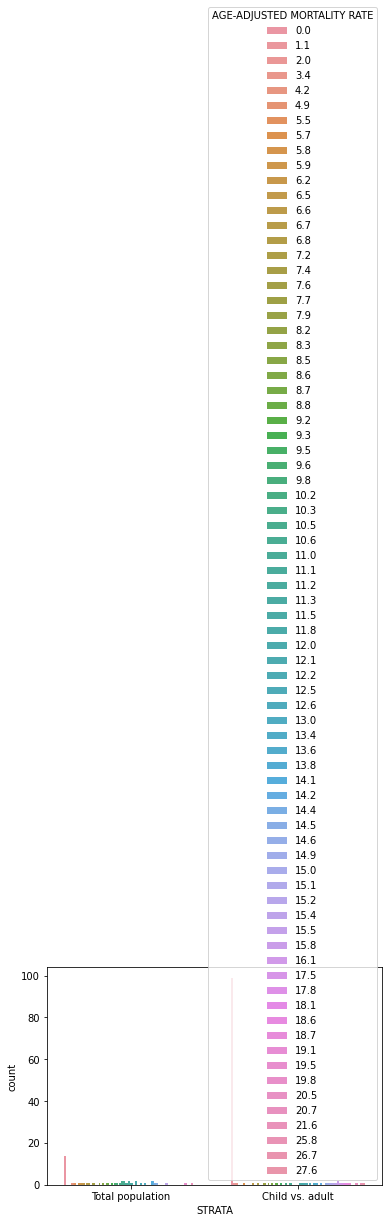

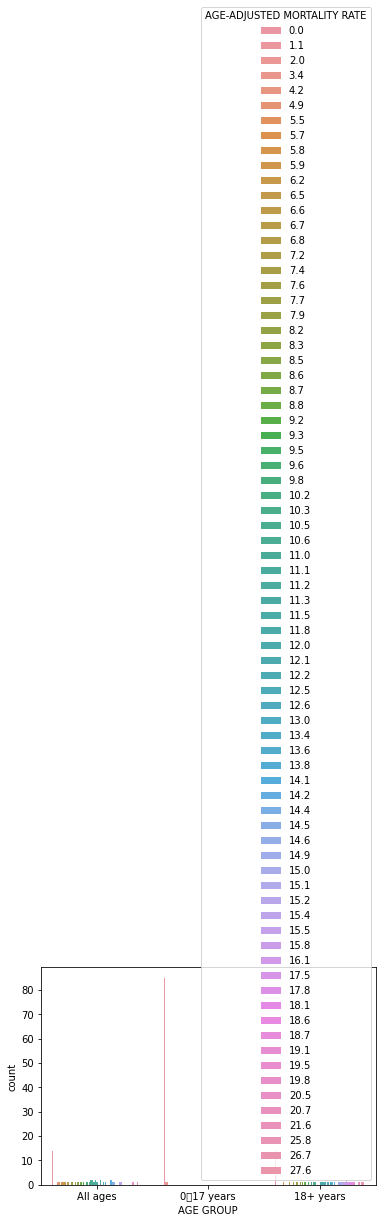

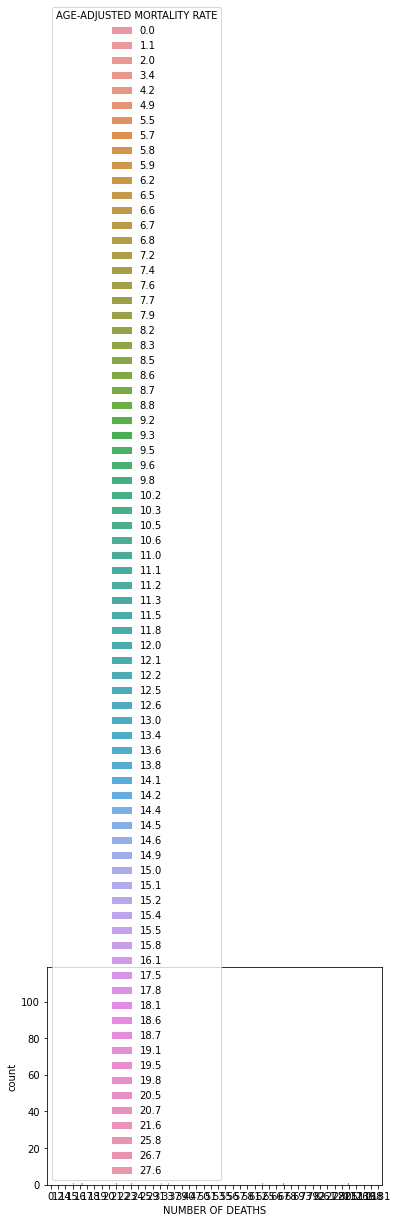

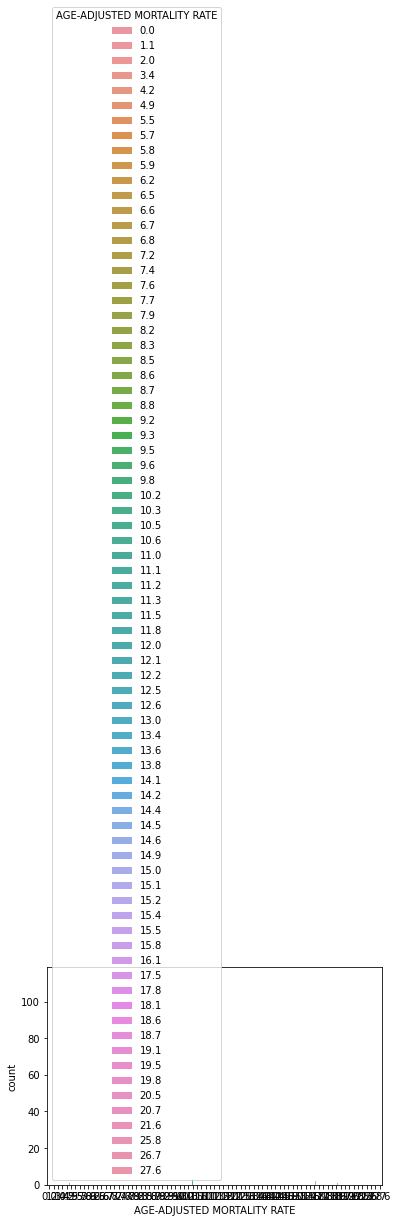

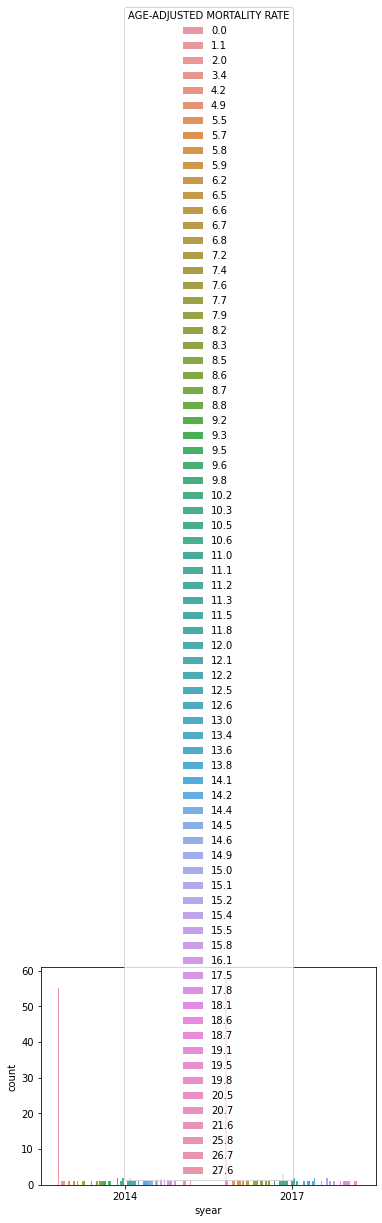

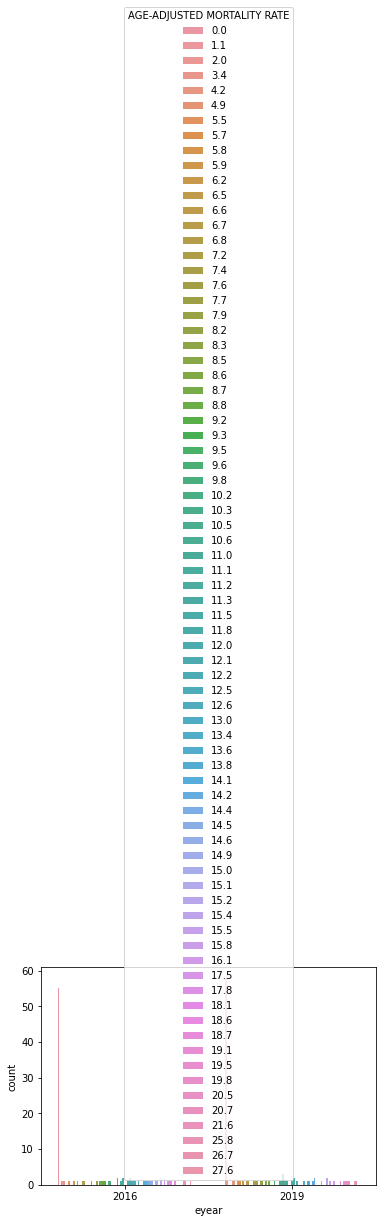

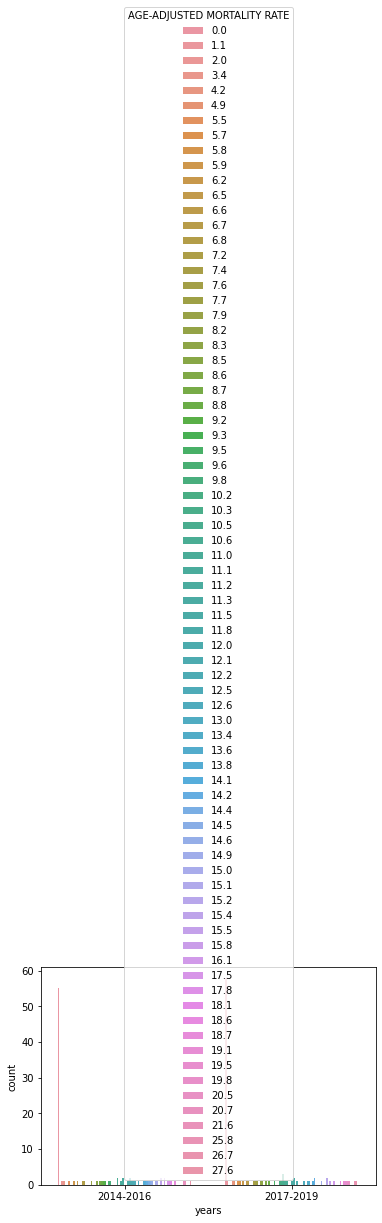

In [123]:
from matplotlib import pyplot as plt

for f in newdf.columns:
    plt.figure()
    ax = sns.countplot(x=f, data = newdf,hue='AGE-ADJUSTED MORTALITY RATE' )

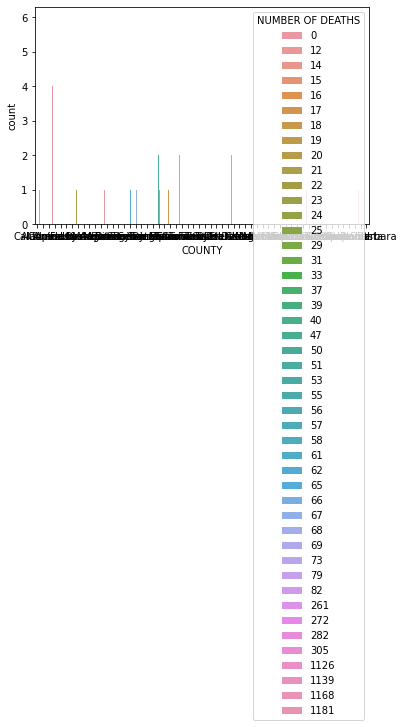

/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


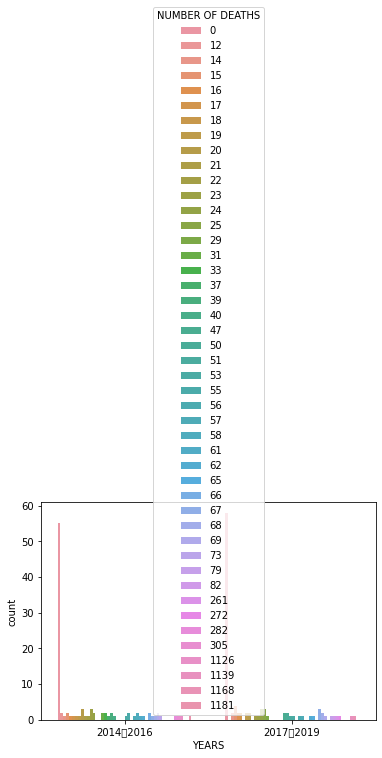

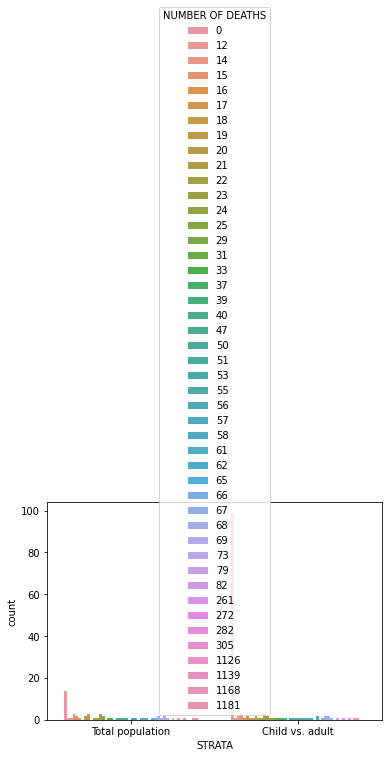

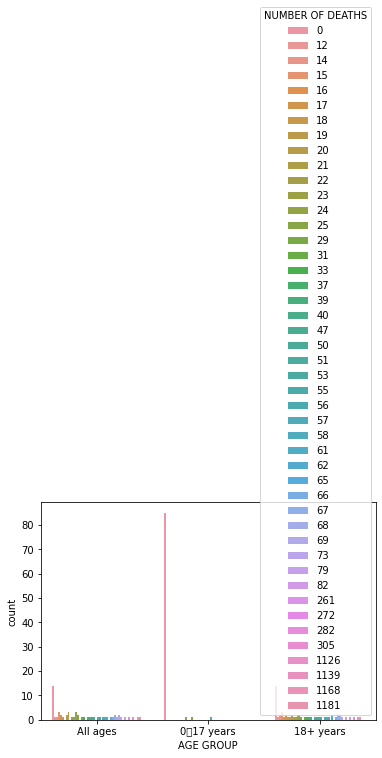

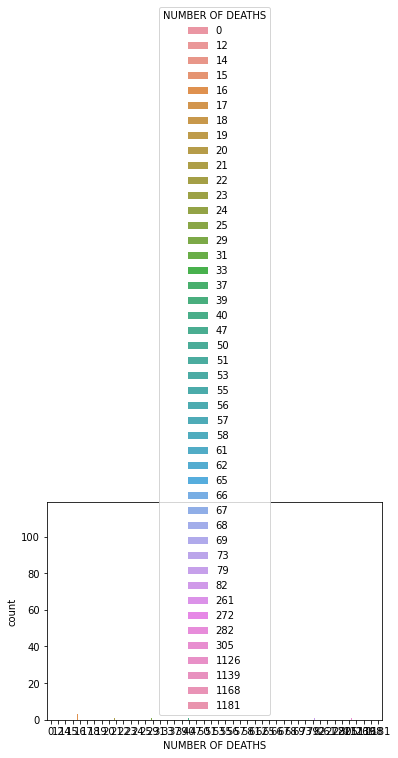

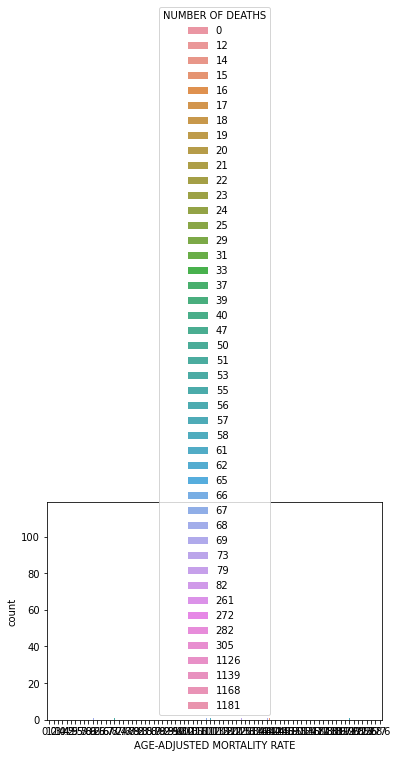

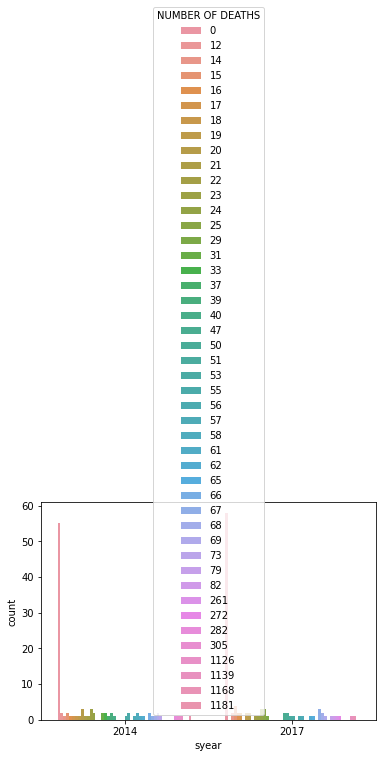

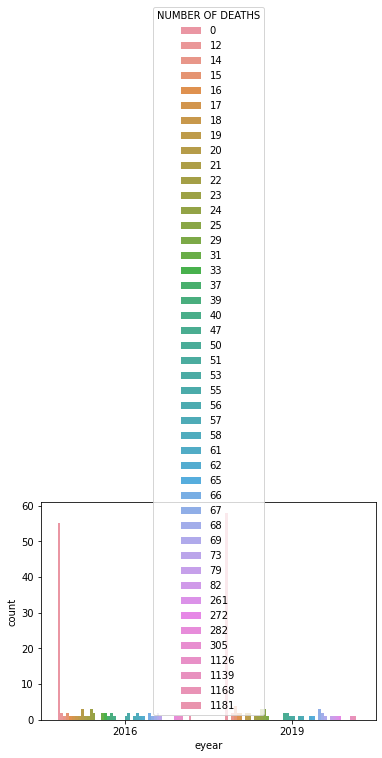

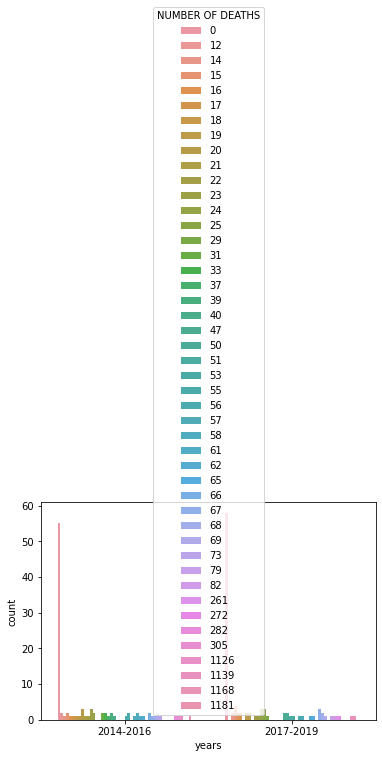

In [124]:

for f in newdf.columns:
    plt.figure()
    ax = sns.countplot(x=f, data = newdf,hue='NUMBER OF DEATHS' )

In [125]:
newdf.columns

Index(['COUNTY', 'YEARS', 'STRATA', 'AGE GROUP', 'NUMBER OF DEATHS',
       'AGE-ADJUSTED MORTALITY RATE', 'syear', 'eyear', 'years'],
      dtype='object')

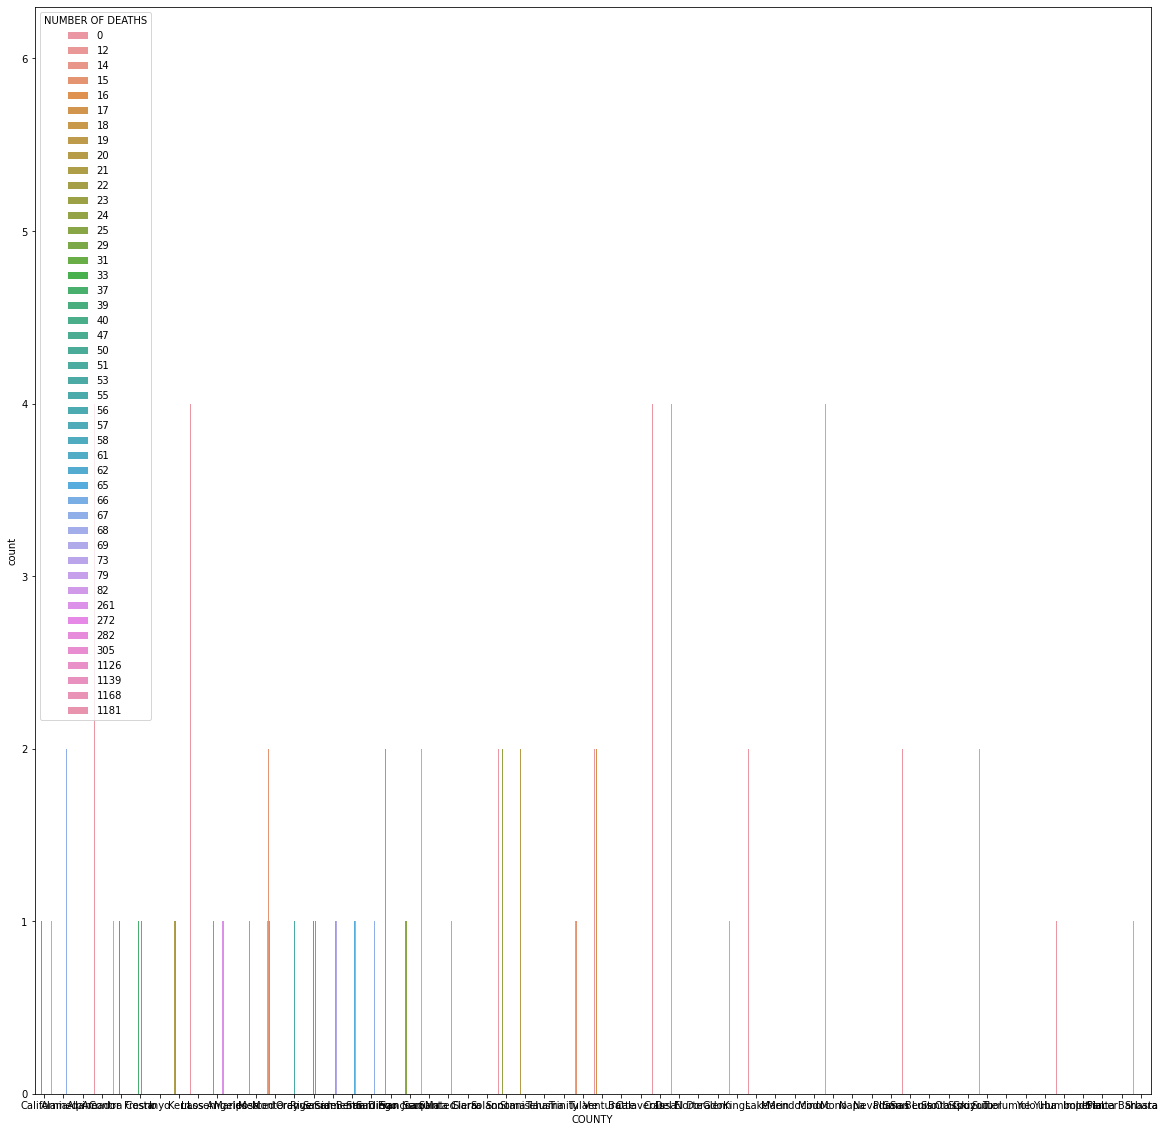

In [126]:
%matplotlib inline
plt.rcParams['figure.figsize']=20,20
ax = sns.countplot(x='COUNTY', data = newdf, hue = 'NUMBER OF DEATHS')

/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


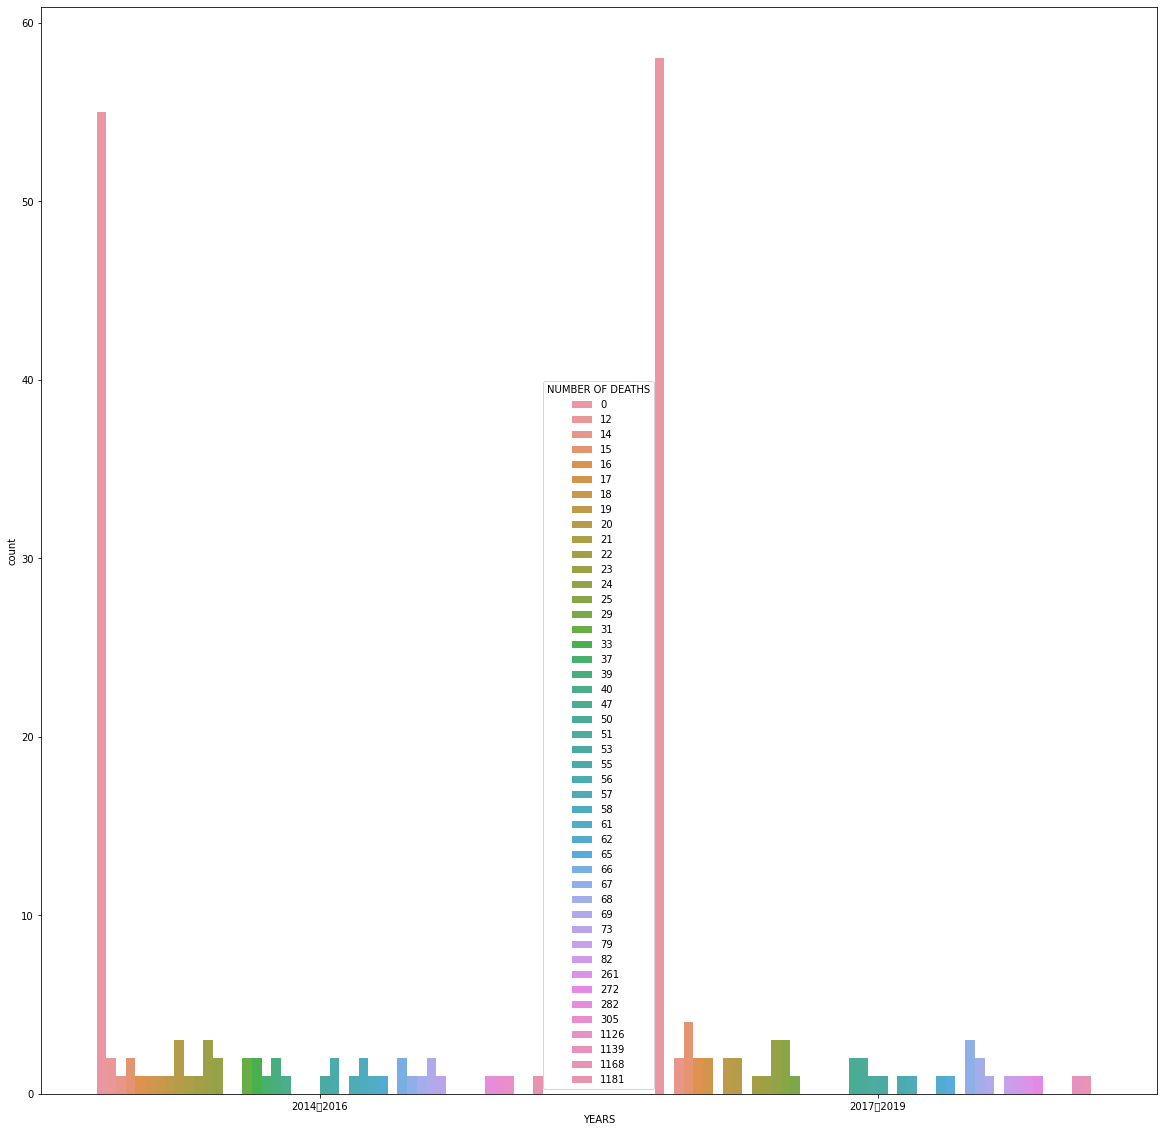

In [127]:
plt.rcParams['figure.figsize']=20,20
ax = sns.countplot(x='YEARS', data = newdf, hue = 'NUMBER OF DEATHS')

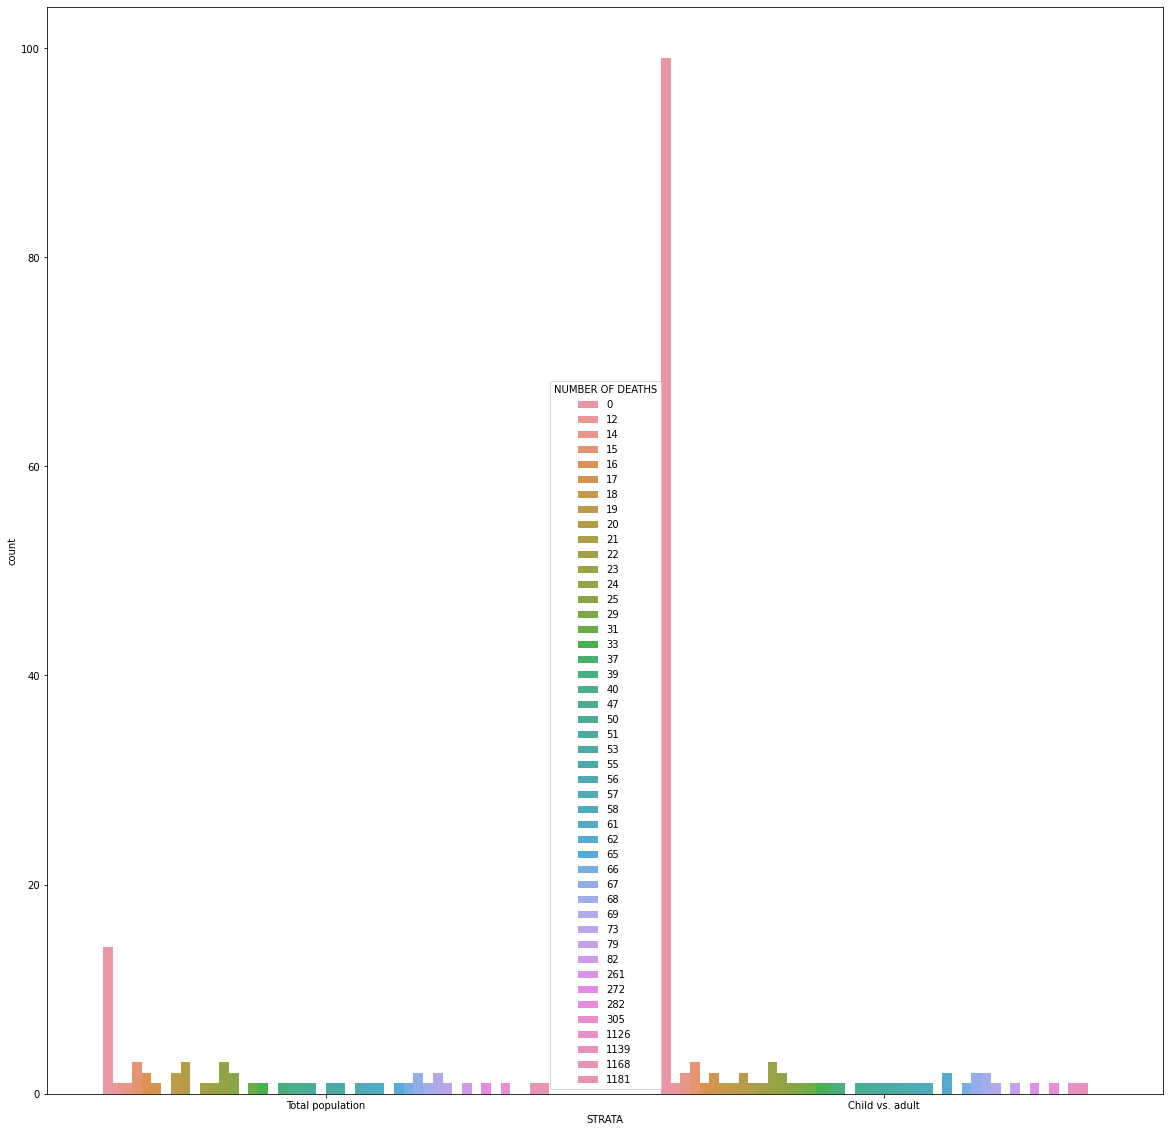

In [128]:
plt.rcParams['figure.figsize']=20,20
ax = sns.countplot(x='STRATA', data = newdf, hue = 'NUMBER OF DEATHS')

/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


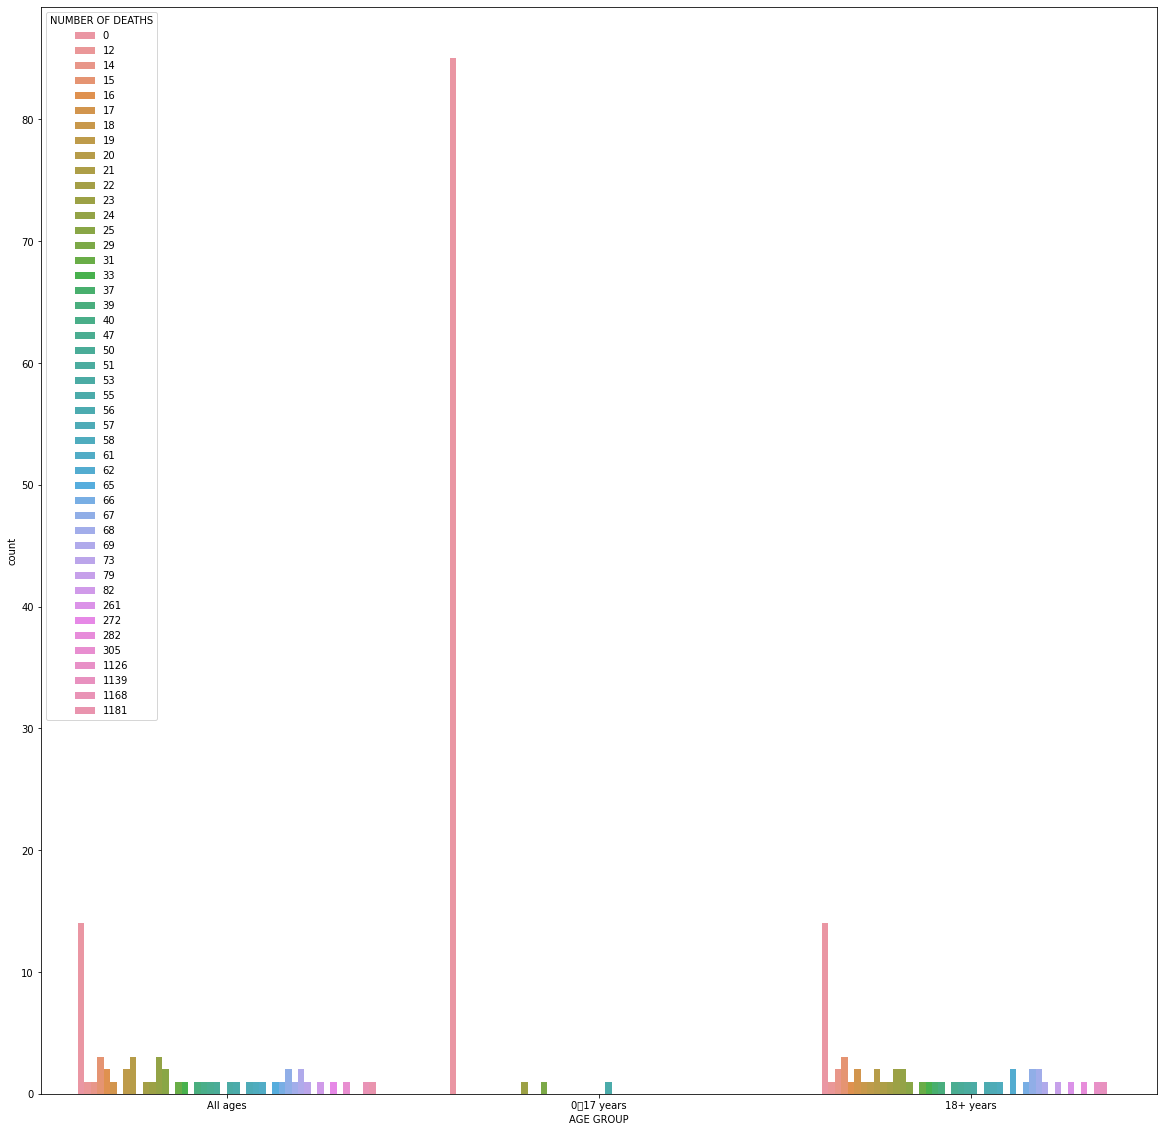

In [129]:
plt.rcParams['figure.figsize']=20,20
ax = sns.countplot(x='AGE GROUP', data = newdf, hue = 'NUMBER OF DEATHS')

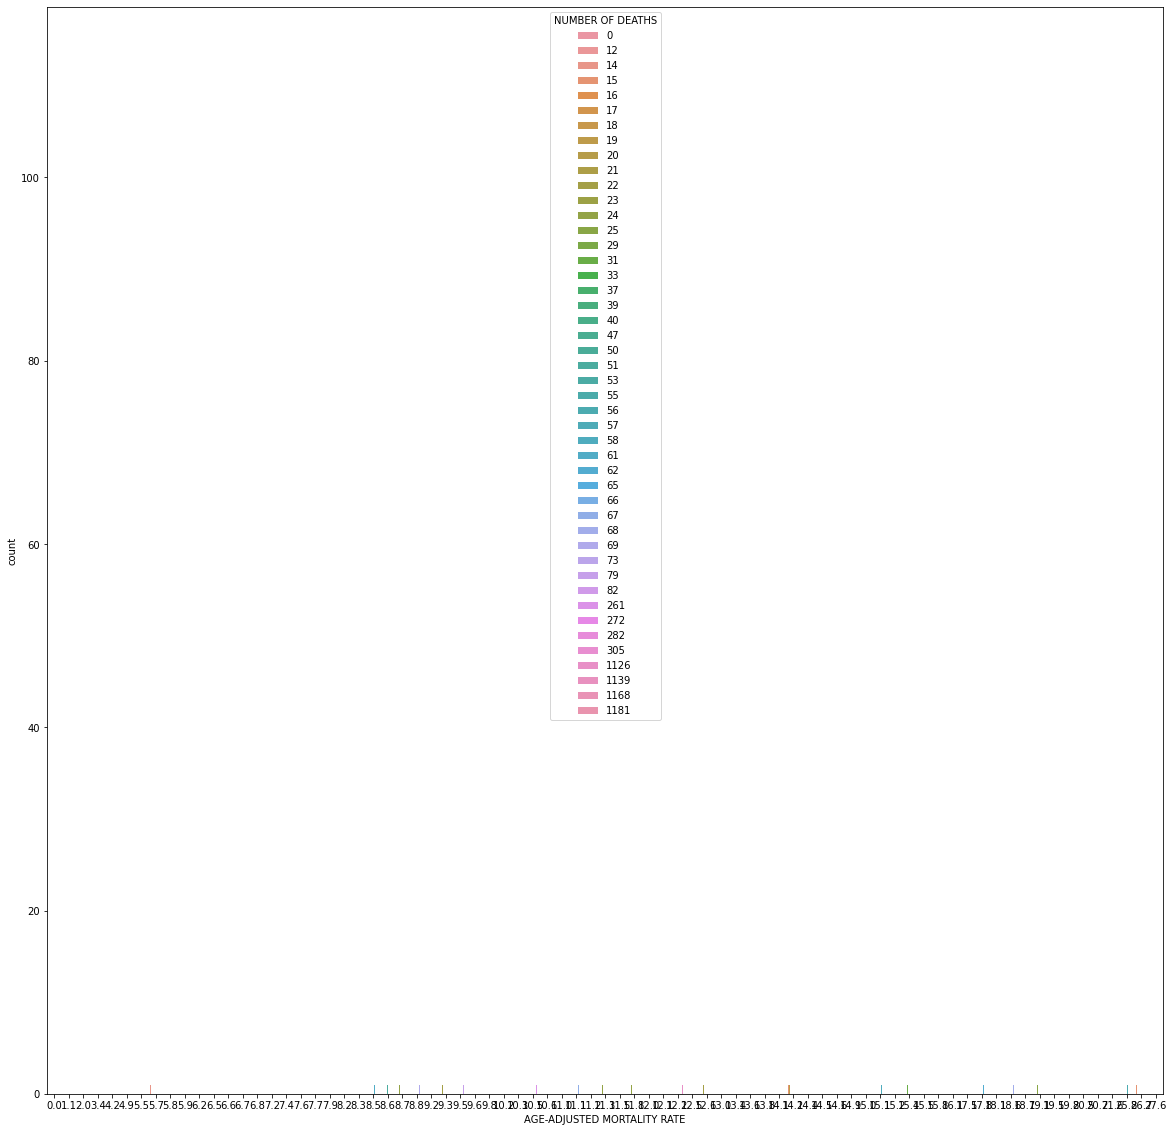

In [131]:
plt.rcParams['figure.figsize']=20,20
ax = sns.countplot(x='AGE-ADJUSTED MORTALITY RATE', data = newdf, hue = 'NUMBER OF DEATHS')

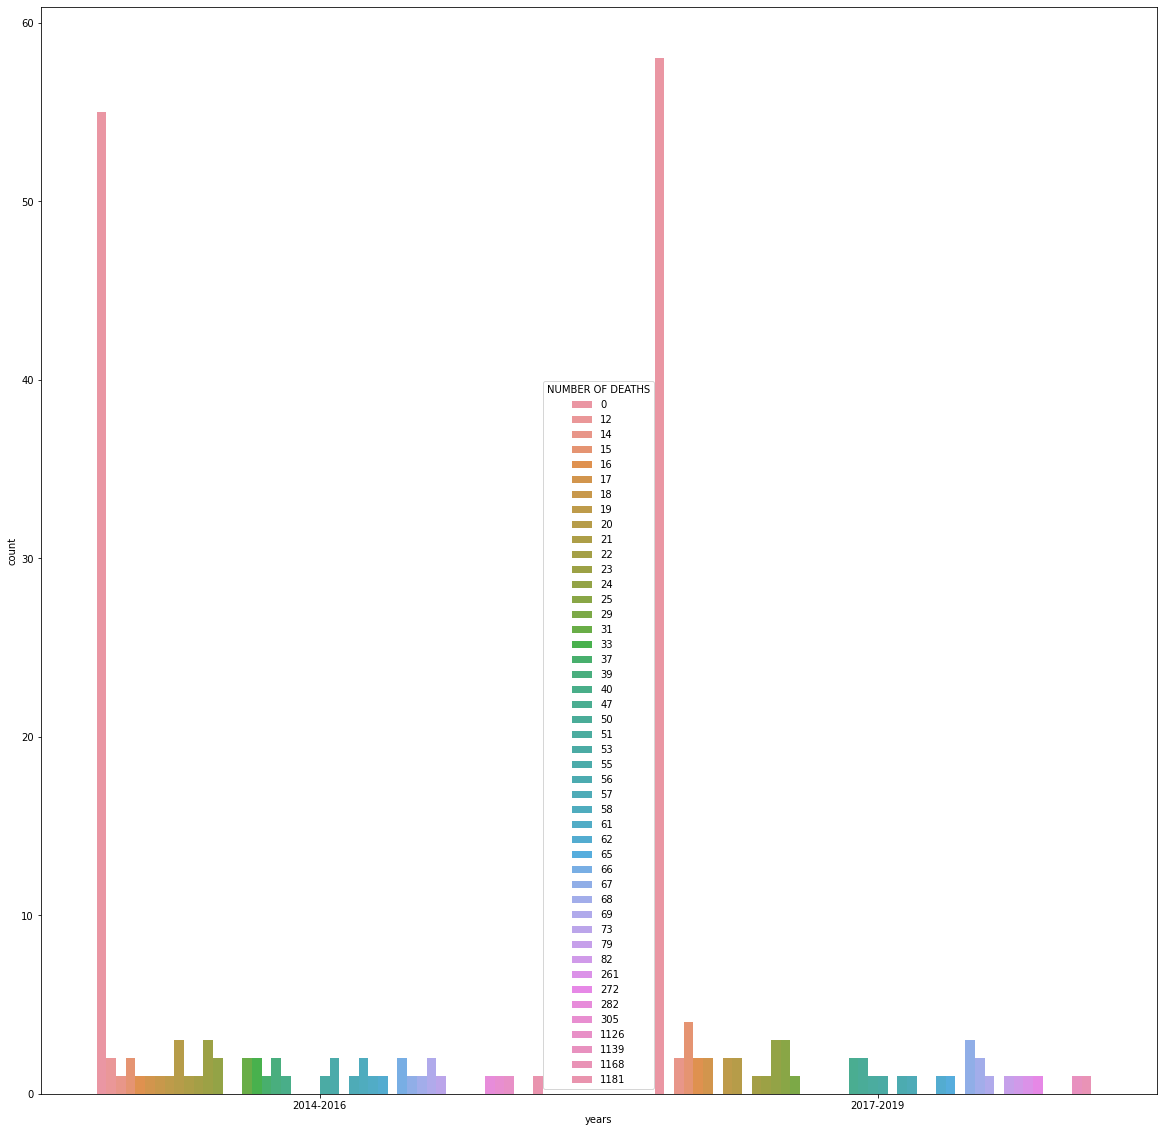

In [132]:
plt.rcParams['figure.figsize']=20,20
ax = sns.countplot(x='years', data = newdf, hue = 'NUMBER OF DEATHS')

In [135]:
table = pd.pivot_table(newdf, values='NUMBER OF DEATHS', index=['COUNTY', 'years'],
                    aggfunc=np.sum)

In [136]:
table

NUMBER OF DEATHS
COUNTY  years                      
Alameda 2014-2016               116
        2017-2019               134
Alpine  2014-2016                 0
        2017-2019                 0
Amador  2014-2016                 0
...                             ...
Ventura 2017-2019                34
Yolo    2014-2016                 0
        2017-2019                 0
Yuba    2014-2016                 0
        2017-2019                 0

[109 rows x 1 columns]

In [139]:
table1 = pd.pivot_table(newdf, values='NUMBER OF DEATHS', index=['COUNTY'],
                    aggfunc=np.sum)
table1
table1.sort_values(('NUMBER OF DEATHS'), ascending=False)

,NUMBER OF DEATHS
COUNTY,
California,4698
Los Angeles,1143
San Diego,273
Orange,269
San Bernardino,268
Sacramento,265
Alameda,250
Santa Clara,233
Riverside,222


In [138]:
table2 = pd.pivot_table(newdf, values='NUMBER OF DEATHS', index=['years'],
                    aggfunc=np.sum)
table2

,NUMBER OF DEATHS
years,
2014-2016,4472
2017-2019,4398


In [140]:
table3 = pd.pivot_table(newdf, values='AGE-ADJUSTED MORTALITY RATE', index=['COUNTY'],
                    aggfunc=np.sum)
table3
table3.sort_values(('AGE-ADJUSTED MORTALITY RATE'), ascending=False)

,AGE-ADJUSTED MORTALITY RATE
COUNTY,
Merced,95.7
Fresno,78.5
Solano,65.9
Sacramento,64.6
Stanislaus,63.8
San Joaquin,59.3
Monterey,57.0
Alameda,54.4
Tulare,54.4


In [141]:
table4 = pd.pivot_table(newdf, values='AGE-ADJUSTED MORTALITY RATE', index=['COUNTY', 'years'],
                    aggfunc=np.sum)
table4
table4.sort_values(('AGE-ADJUSTED MORTALITY RATE'), ascending=False)

AGE-ADJUSTED MORTALITY RATE
COUNTY      years                                 
Merced      2014-2016                         49.2
            2017-2019                         46.5
Fresno      2017-2019                         45.3
San Joaquin 2014-2016                         36.1
Solano      2017-2019                         35.7
...                                            ...
Marin       2014-2016                          0.0
Lassen      2017-2019                          0.0
            2014-2016                          0.0
Lake        2017-2019                          0.0
Yuba        2017-2019                          0.0

[109 rows x 1 columns]